In [1]:
from tkinter import Image
import requests
import time


def download_site(url, session):
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with requests.Session() as session:
        for url in sites:
            download_site(url, session)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Downloaded {len(sites)} in {duration} seconds")

Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jyth

In [2]:
import concurrent.futures
import requests
import threading
import time


thread_local = threading.local()


def get_session():
    if not hasattr(thread_local, "session"):
        thread_local.session = requests.Session()
    return thread_local.session


def download_site(url):
    session = get_session()
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Downloaded {len(sites)} in {duration} seconds")

Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Rea

# Asyncio
## niestety nie mogłem uruchomić tego w notebooku, uruchomiłem więc w osobnym pliku pythonowskim i załczam wynik na screenshocie oraz plik na githubie


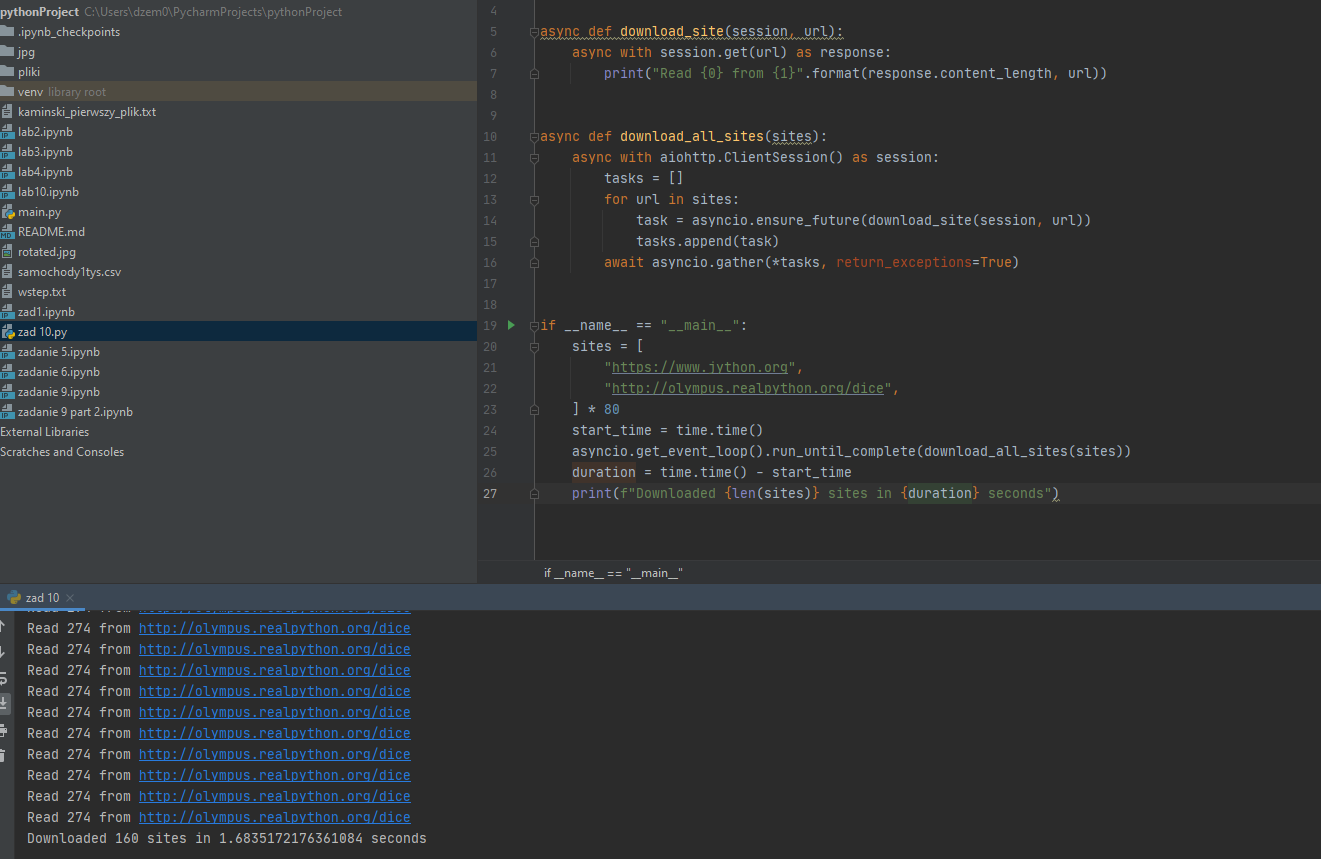

In [3]:
from IPython.display import Image
Image("lab10fota/screenAsyncio.png")

# multiprocessing
## taka sama sytuacja jak wyżej, załączam screen oraz plik "zadanie10multiprocessing.py"

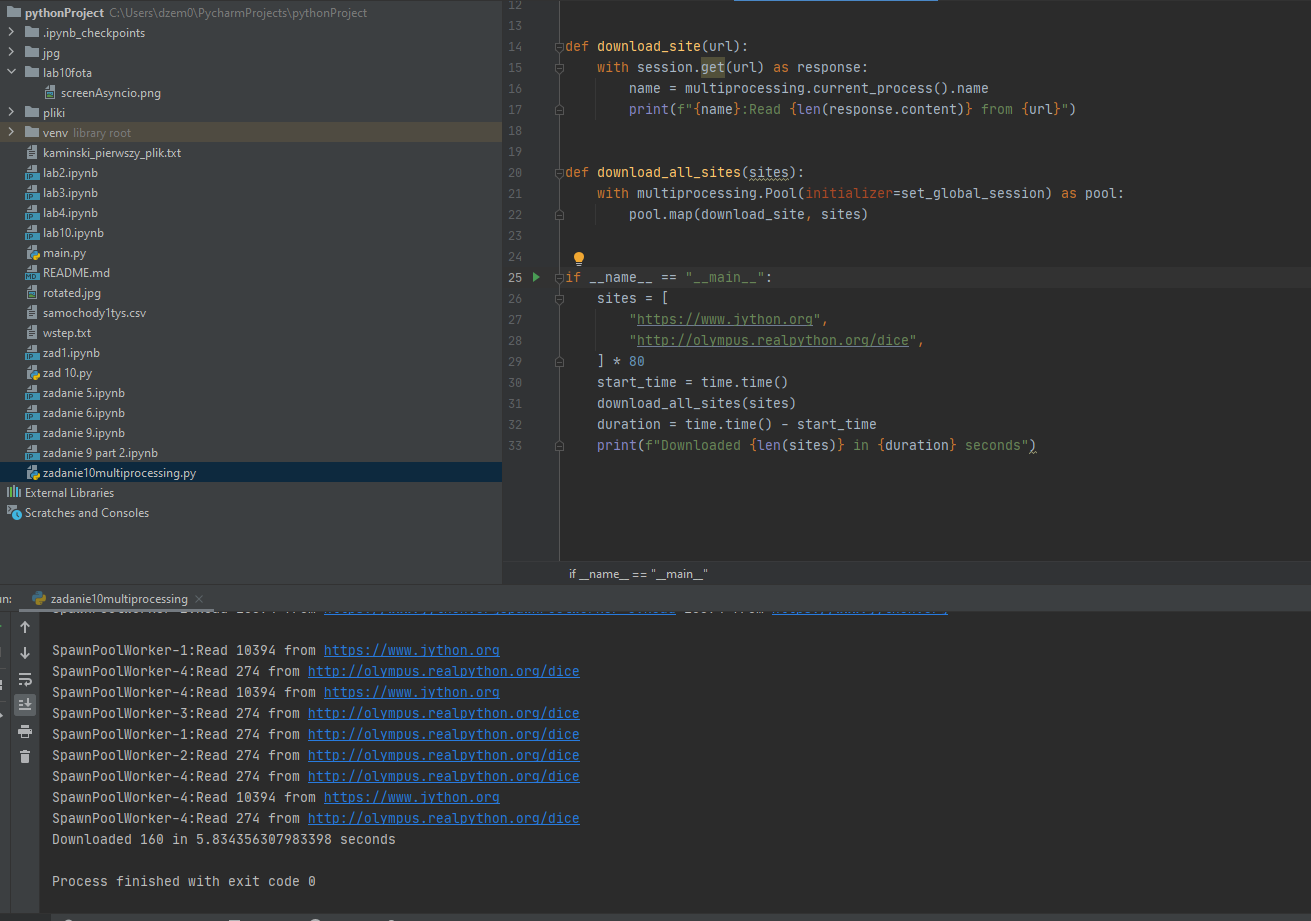

In [4]:
Image("lab10fota/screenMultiprocesing.png")

CPU - Bound Synchronus

In [5]:
import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    for number in numbers:
        cpu_bound(number)


if __name__ == "__main__":
    numbers = [5_000_000 + x for x in range(20)]

    start_time = time.time()
    find_sums(numbers)
    duration = time.time() - start_time
    print(f"Duration {duration} seconds")

Duration 13.286402940750122 seconds


CPU - multiprocessing

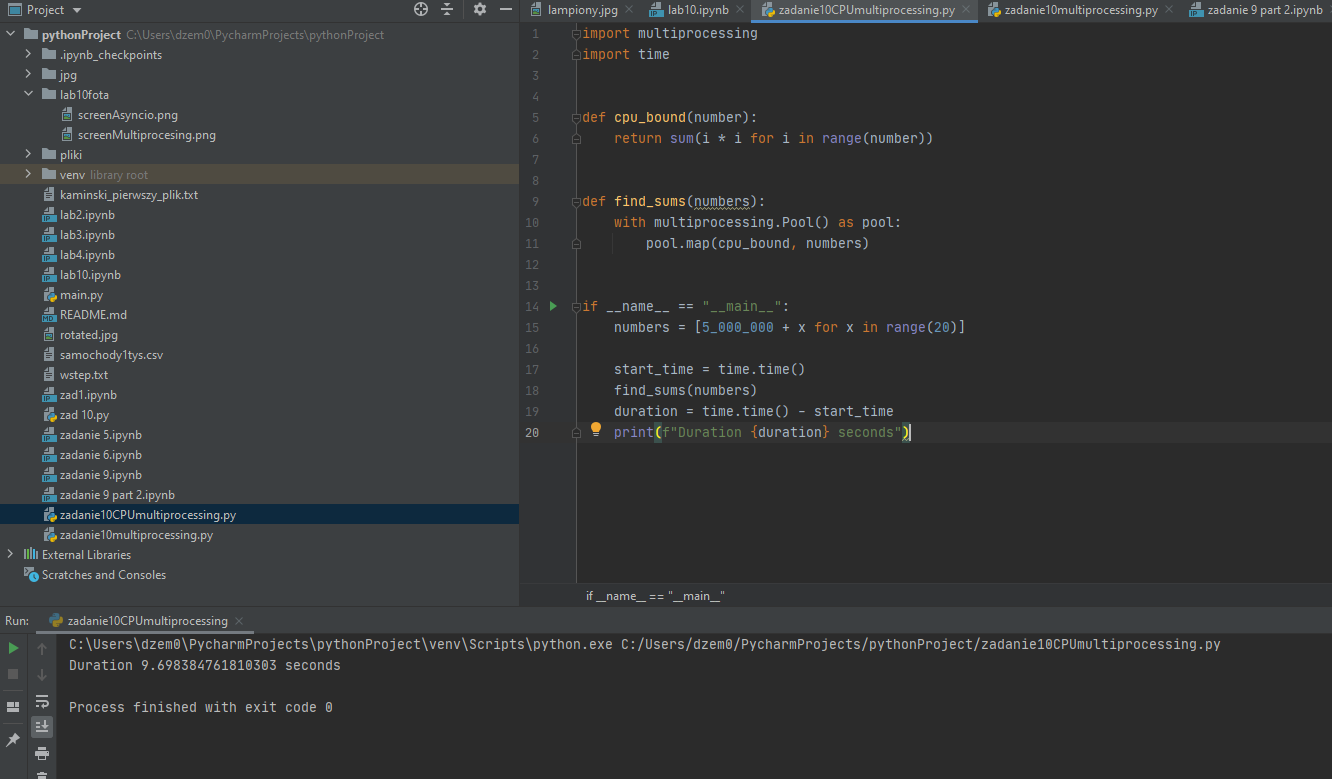

In [6]:
Image("lab10fota/screenCPUMultiprocessing.png")

# Part 2
##Synchronous - do pobierania używam Picsum

In [10]:
import os
from urllib import request
import json
from imgurpython import ImgurClient
import timeit


def download_images():
    response = requests.get("https://picsum.photos/v2/list")
    if response.status_code != 200:
        raise AttributeError('GET /tasks/ {}'.format(response.status_code))
    data = json.loads(response.text)

    pictures=[]
    for s in data:
        pictures.append(s['download_url']+".jpg")
    return pictures

def saveImages(link):
    filename = link.split('/')[6].split('.')[0]
    fileformat = link.split('/')[6].split('.')[1]
    request.urlretrieve(link, "downloads/{}.{}".format(filename, fileformat))

def main():
    images = download_images()
    for image in images:
        saveImages(image)

start_time = time.time()
main()
duration_synch = time.time() - start_time
print(f"Time taken to download 30 images into the downloads folder synchronously: {duration_synch}")

Time taken to download 30 images into the downloads folder synchronously: 25.685487985610962


## multithreading

In [12]:

from concurrent.futures import ThreadPoolExecutor
def process_images_threading():
    images = download_images()
    with ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(saveImages,images)

start_time = time.time()
process_images_threading()
duration_threading = time.time() - start_time
print(f"Time taken to download 30 images into the downloads folder with multithreading: {duration_threading}")

Time taken to download 30 images into the downloads folder with multithreading: 16.797247409820557


## multiprocessing

In [13]:
import zadanie10multiprocessing2 as multiprocessing_file
import multiprocessing
def process_images_multiprocessing():
    images = download_images()
    pool = multiprocessing.Pool(multiprocessing.cpu_count())
    pool.map(multiprocessing_file.multiprocessing_images,images)


start_time = time.time()
process_images_multiprocessing()
duration_multiprocessing = time.time() - start_time
print(f"Time taken to download 30 images into the downloads folder with multiprocessing: {duration_multiprocessing}")

Time taken to download 30 images into the downloads folder with multiprocessing: 16.049935817718506


## asyncio

In [15]:
import asyncio
import aiohttp
import nest_asyncio
nest_asyncio.apply()

async def download_images_asyncio(link, session):
    filename = link.split('/')[6].split('.')[0]
    fileformat = link.split('/')[6].split('.')[1]
    async with session.get(link) as response:
        with open("downloads/{}.{}".format(filename, fileformat), 'wb') as fd:
            async for data in response.content.iter_chunked(1024):
                fd.write(data)

async def main_asyncio():
    images = download_images()

    async with aiohttp.ClientSession() as session:
        tasks=[download_images_asyncio(image,session)for image in images]
        return await asyncio.gather(*tasks)

start_time = time.time()
asyncio.run(main_asyncio())
duration_asyncio = time.time() - start_time
print(f"Time taken to download 30 images into the downloads folder with asyncio: {duration_asyncio}")

Time taken to download 30 images into the downloads folder with asyncio: 20.303478956222534
